#### Data Partitioning

* Dataset is to be partitioned into three parts
1. TRAIN dataset - contains 80% to 95% of the whole data depending on the number of images and it is used to train the Neural network
* Metrics include: training loss and training accuracy
2. DEV (validation) dataset: Contains 5% to 2.5% of the whole data depending on the number of images
* Used to validate the neural network model on unseen data during the training
* Metrics include: validation loss and validation accuracy
3. TEST dataset
* Contains 5% to 2.5% of the whole data depending on the number of images
* Used to test the neural network model on unseen data after completion of the training
* Metrics: Test Loss and Test Accuracy

#### Loading data from HDF5 Dataset file

In [15]:
from pathlib import Path
import h5py
import numpy as np
IMAGE_SIZE = 224


In [12]:
# Change the paths below according to the system on which the code is being run
# good to have the size in the name in case you create datasets with different image sizes.
H5DATASET_FOLDER = "../../h5-dataset"  # created at run time
HDF5_DATASET_PATH = f"{H5DATASET_FOLDER}/vehicle-type-dataset-SIZE{IMAGE_SIZE}.hdf5"  # created when the code is run
HDF5_TARGET_DATASET_PATH=f'{H5DATASET_FOLDER}/vehicle-type-dataset-SIZE{IMAGE_SIZE}.hdf5'

print(HDF5_DATASET_PATH)
print(HDF5_TARGET_DATASET_PATH)

../../h5-dataset/vehicle-type-dataset-SIZE224.hdf5
../../h5-dataset/vehicle-type-dataset-SIZE224.hdf5


#### Loading the dataset

In [13]:
#read the dataset
hf =h5py.File(HDF5_TARGET_DATASET_PATH, "r")

In [18]:
class_label_string_length="S30"

#extract labels
labels_in_ascii =np.array(hf["labels"]).astype(class_label_string_length)
print(labels_in_ascii)

[b'car-sedan-alltypes' b'car-sedan-alltypes' b'car-bus_alltypes' ...
 b'motorcycle-bicycle-racing' b'car-suv-alltypes'
 b'motorcycle-motorbike-sport']


In [19]:
data = np.array(hf["images"]).astype("f8")

In [21]:
#get labels in string format
labels = [n.decode('unicode_escape') for n in labels_in_ascii]
#print(labels)
print(f'Number of lables: {len(labels)}')

Number of lables: 1362


In [22]:
#Unique labels
np.unique(labels)

array(['car-bus_alltypes', 'car-sedan-alltypes', 'car-suv-alltypes',
       'motorcycle-bicycle-kids', 'motorcycle-bicycle-mountain',
       'motorcycle-bicycle-racing', 'motorcycle-motorbike-chopper',
       'motorcycle-motorbike-sport'], dtype='<U28')

#### Dividing the dataset

* ![Strategy for Dividing Dataset](../../images/strategyForDividingDataset.png)

#### Select a uniformly Distributed Dataset

In [23]:
#Use this method to select a sample of data uniformly distributed

def select_uniformly_distributed_data_set(data, labels, class_dict, max_number_of_images =10):
  sample_data =[]
  sample_labels =[]
  for i, image in enumerate(data):
    label =labels[i]
    if class_dict[label] <max_number_of_images:
      sample_data.append(image)
      sample_labels.append(label)
      class_dict[label] += 1
  to_continue = False
  for x,y in class_dict.items():
    if y<max_number_of_images:
      to_continue == True
  if to_continue ==False:
    return np.array(sample_data), np.array(sample_labels), class_dict

In [24]:
class_dict ={}
for car_class in np.unique(labels):
  class_dict[car_class] =0
print(class_dict)

{'car-bus_alltypes': 0, 'car-sedan-alltypes': 0, 'car-suv-alltypes': 0, 'motorcycle-bicycle-kids': 0, 'motorcycle-bicycle-mountain': 0, 'motorcycle-bicycle-racing': 0, 'motorcycle-motorbike-chopper': 0, 'motorcycle-motorbike-sport': 0}


In [29]:
# sample_data, sample_labels,class_dict=select_uniformly_distributed_data_sample(data,labels,class_dict, max_number_of_images=80)

# Use this if you want to use the whole dataset as is without balancing classes
sample_data, sample_labels, class_dict = data,np.array(labels), class_dict

print(f'Sample Data Shape: {sample_data.shape}')
print(f'Sample Data Label shape: {sample_labels.shape}')
print(class_dict)

Sample Data Shape: (1362, 224, 224, 3)
Sample Data Label shape: (1362,)
{'car-bus_alltypes': 10, 'car-sedan-alltypes': 10, 'car-suv-alltypes': 10, 'motorcycle-bicycle-kids': 10, 'motorcycle-bicycle-mountain': 10, 'motorcycle-bicycle-racing': 10, 'motorcycle-motorbike-chopper': 10, 'motorcycle-motorbike-sport': 10}


#### Display the dataset

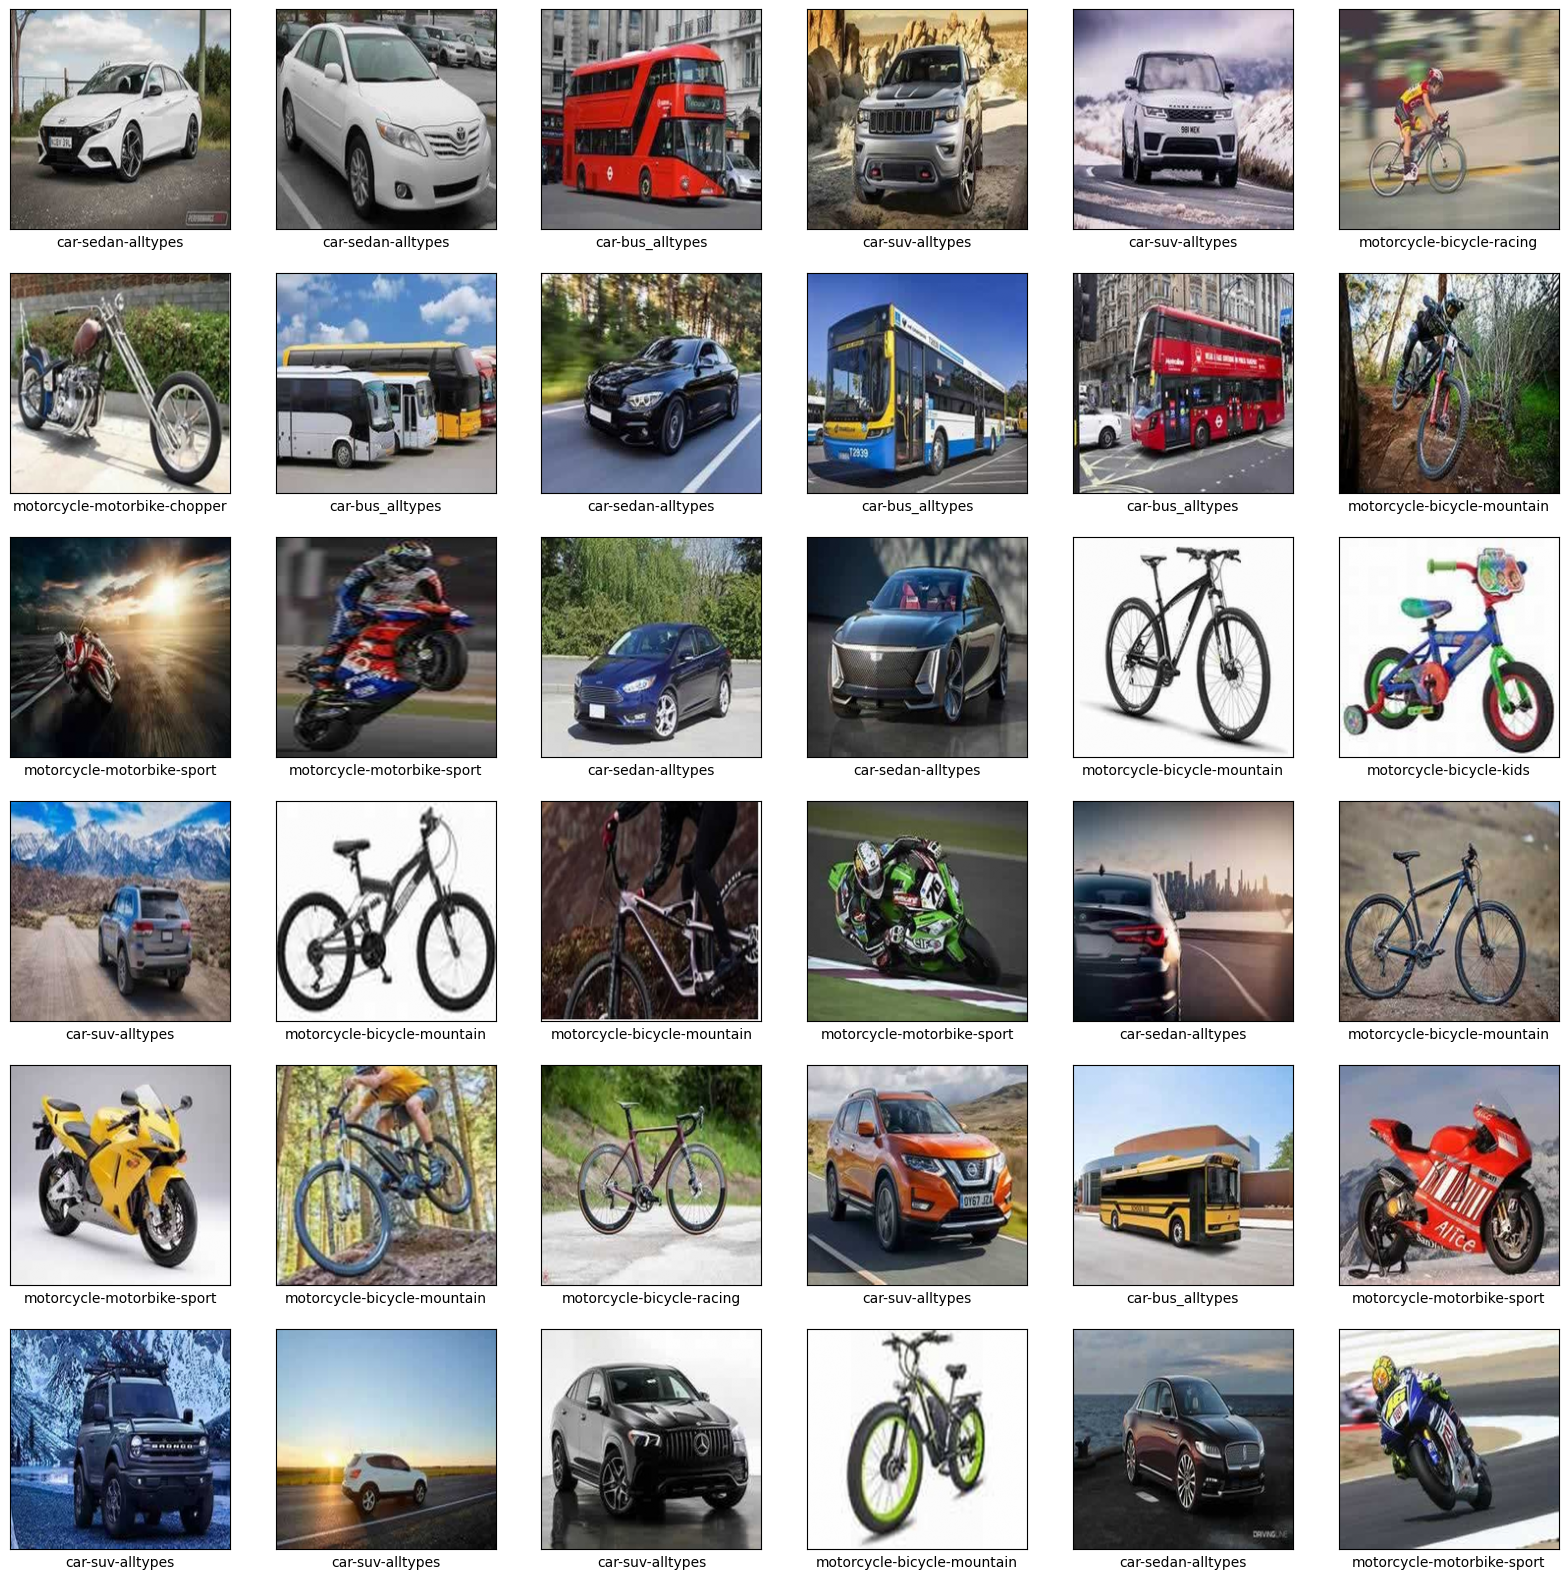

In [32]:
import sys
sys.path.append("../../")  # Add the path to your module if necessary
from utils_lib import plot_sample_from_dataset

plot_sample_from_dataset(sample_data, sample_labels, rows=6, columns=6,width=20, height=20)

#### 4. Split Data into Training and Test

* **Divide the Whole Dataset into Train/Test**

In [35]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [36]:
test_split_ratio = 0.2  # 20% of images will be in the test and 80% in the training set

trainX, testX, trainLabels, testLabels = train_test_split(sample_data, sample_labels,test_size = test_split_ratio, stratify=sample_labels, random_state=42)

# perform one-hot encoding on the labels
print(f"Sample of train labels:  {trainLabels[:4]}")
lb = LabelBinarizer()
train_binary_labels = lb.fit_transform(trainLabels)
print(f'Sample of train_binary_labels after Binarizer\n{train_binary_labels[:4]}')

print(f'Sample of test labels: {testLabels[:4]}')
test_binary_labels = lb.fit_transform(testLabels)
print(f"Sample of train_binary_labels after Binarizer\n{test_binary_labels[:4]}")

trainY = train_binary_labels
testY = test_binary_labels

print(f'trainX.shape: {trainX.shape}')
print(f"trainY.shape: {trainY.shape}")
print(f"testX.shape: {testX.shape}")
print(f"testY.shape: {testY.shape}")

Sample of train labels:  ['car-suv-alltypes' 'car-sedan-alltypes' 'car-suv-alltypes'
 'motorcycle-bicycle-kids']
Sample of train_binary_labels after Binarizer
[[0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
Sample of test labels: ['car-suv-alltypes' 'car-bus_alltypes' 'car-sedan-alltypes'
 'motorcycle-motorbike-sport']
Sample of train_binary_labels after Binarizer
[[0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]]
trainX.shape: (1089, 224, 224, 3)
trainY.shape: (1089, 8)
testX.shape: (273, 224, 224, 3)
testY.shape: (273, 8)


In [37]:
print(lb.classes_)

['car-bus_alltypes' 'car-sedan-alltypes' 'car-suv-alltypes'
 'motorcycle-bicycle-kids' 'motorcycle-bicycle-mountain'
 'motorcycle-bicycle-racing' 'motorcycle-motorbike-chopper'
 'motorcycle-motorbike-sport']


#### Divide the Test Dataset into Dev/Test

In [38]:
# print("testX.shape: ",testX.shape)
# print("testLabels.shape: ",np.array(testLabels).shape)

dev_test_ratio = 0.5
(devX, testX, devLabels, testLabels) = train_test_split(
    testX, testLabels, test_size=dev_test_ratio, stratify=testLabels, random_state=42
)

# perform one-hot encoding on the labels
print(f"sample of dev labels: {devLabels[:4]}")
lb = LabelBinarizer()
train_binary_labels = lb.fit_transform(devLabels)
print(f"sample of dev_binary_labels after Binarizer: \n{train_binary_labels[:4]}")


print(f"sample of test labels: {testLabels[:4]}")
test_binary_labels = lb.fit_transform(testLabels)
print(f"sample of test_binary_labels after Binarizer: \n{test_binary_labels[:4]}")

devY = train_binary_labels
testY = test_binary_labels

print(f"devX.shape:{devX.shape}")
print(f"devY.shape: { devY.shape}")
print(f"testX.shape: {testX.shape}")
print(f"testY.shape:{testY.shape}")

sample of dev labels: ['motorcycle-bicycle-mountain' 'car-bus_alltypes' 'car-bus_alltypes'
 'car-sedan-alltypes']
sample of dev_binary_labels after Binarizer: 
[[0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]]
sample of test labels: ['car-bus_alltypes' 'car-suv-alltypes' 'car-sedan-alltypes'
 'motorcycle-bicycle-kids']
sample of test_binary_labels after Binarizer: 
[[1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
devX.shape:(136, 224, 224, 3)
devY.shape: (136, 8)
testX.shape: (137, 224, 224, 3)
testY.shape:(137, 8)


#### 5. Create the HDF5 Balanced Dataset

In [40]:
import h5py
hf =h5py.File(HDF5_TARGET_DATASET_PATH, 'w')

OSError: Unable to synchronously create file (unable to truncate a file which is already open)

In [39]:
# Create the training dataset
hf.create_dataset(
    "trainX",
    shape=trainX.shape,
    maxshape=trainX.shape,
    compression="gzip",
    compression_opts=9,
    data=trainX,
)

In [ ]:
hf.create_dataset(
    "trainY",
    shape=trainY.shape,
    maxshape=trainY.shape,
    compression="gzip",
    compression_opts=9,
    data=trainY,
)

In [ ]:
hf.create_dataset(
    "devX",
    shape=devX.shape,
    maxshape=devX.shape,
    compression="gzip",
    compression_opts=9,
    data=devX,
)

In [ ]:
hf.create_dataset(
    "devY",
    shape=devY.shape,
    maxshape=devY.shape,
    compression="gzip",
    compression_opts=9,
    data=devY,
)

In [ ]:
hf.create_dataset(
    "testX",
    shape=testX.shape,
    maxshape=testX.shape,
    compression="gzip",
    compression_opts=9,
    data=testX,
)

In [ ]:
hf.create_dataset(
    "testY",
    shape=testY.shape,
    maxshape=testY.shape,
    compression="gzip",
    compression_opts=9,
    data=testY,
)

In [ ]:
train_labels_ascii = [n.encode("unicode_escape") for n in trainLabels]
dev_labels_ascii = [n.encode("unicode_escape") for n in devLabels]
test_labels_ascii = [n.encode("unicode_escape") for n in testLabels]

# print(train_labels_ascii)

In [ ]:
hf.create_dataset(
    "trainLabels",
    shape=np.array(trainLabels).shape,
    compression="gzip",
    compression_opts=9,
    data=train_labels_ascii,
    dtype=class_label_string_length,
)

In [ ]:
hf.create_dataset(
    "devLabels",
    shape=np.array(devLabels).shape,
    compression="gzip",
    compression_opts=9,
    data=dev_labels_ascii,
    dtype=class_label_string_length,
)

In [ ]:
hf.create_dataset(
    "testLabels",
    shape=np.array(testLabels).shape,
    compression="gzip",
    compression_opts=9,
    data=test_labels_ascii,
    dtype=class_label_string_length,
)

In [ ]:
hf.close()